<a href="https://colab.research.google.com/github/dafnep4/Dafne-Petrelli-s-coding/blob/main/Coursework_2_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import statsmodels.api as sm

In [2]:
df=pd.read_csv("delhi_aqi.csv")

In [3]:
df["date"]= pd.to_datetime(df["date"], errors="coerce", utc=True)
df.head(5)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00+00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00+00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00+00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00+00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00+00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    18776 non-null  datetime64[ns, UTC]
 1   co      18776 non-null  float64            
 2   no      18776 non-null  float64            
 3   no2     18776 non-null  float64            
 4   o3      18776 non-null  float64            
 5   so2     18776 non-null  float64            
 6   pm2_5   18776 non-null  float64            
 7   pm10    18776 non-null  float64            
 8   nh3     18776 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 1.3 MB


In [5]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [6]:
print(df.isna().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


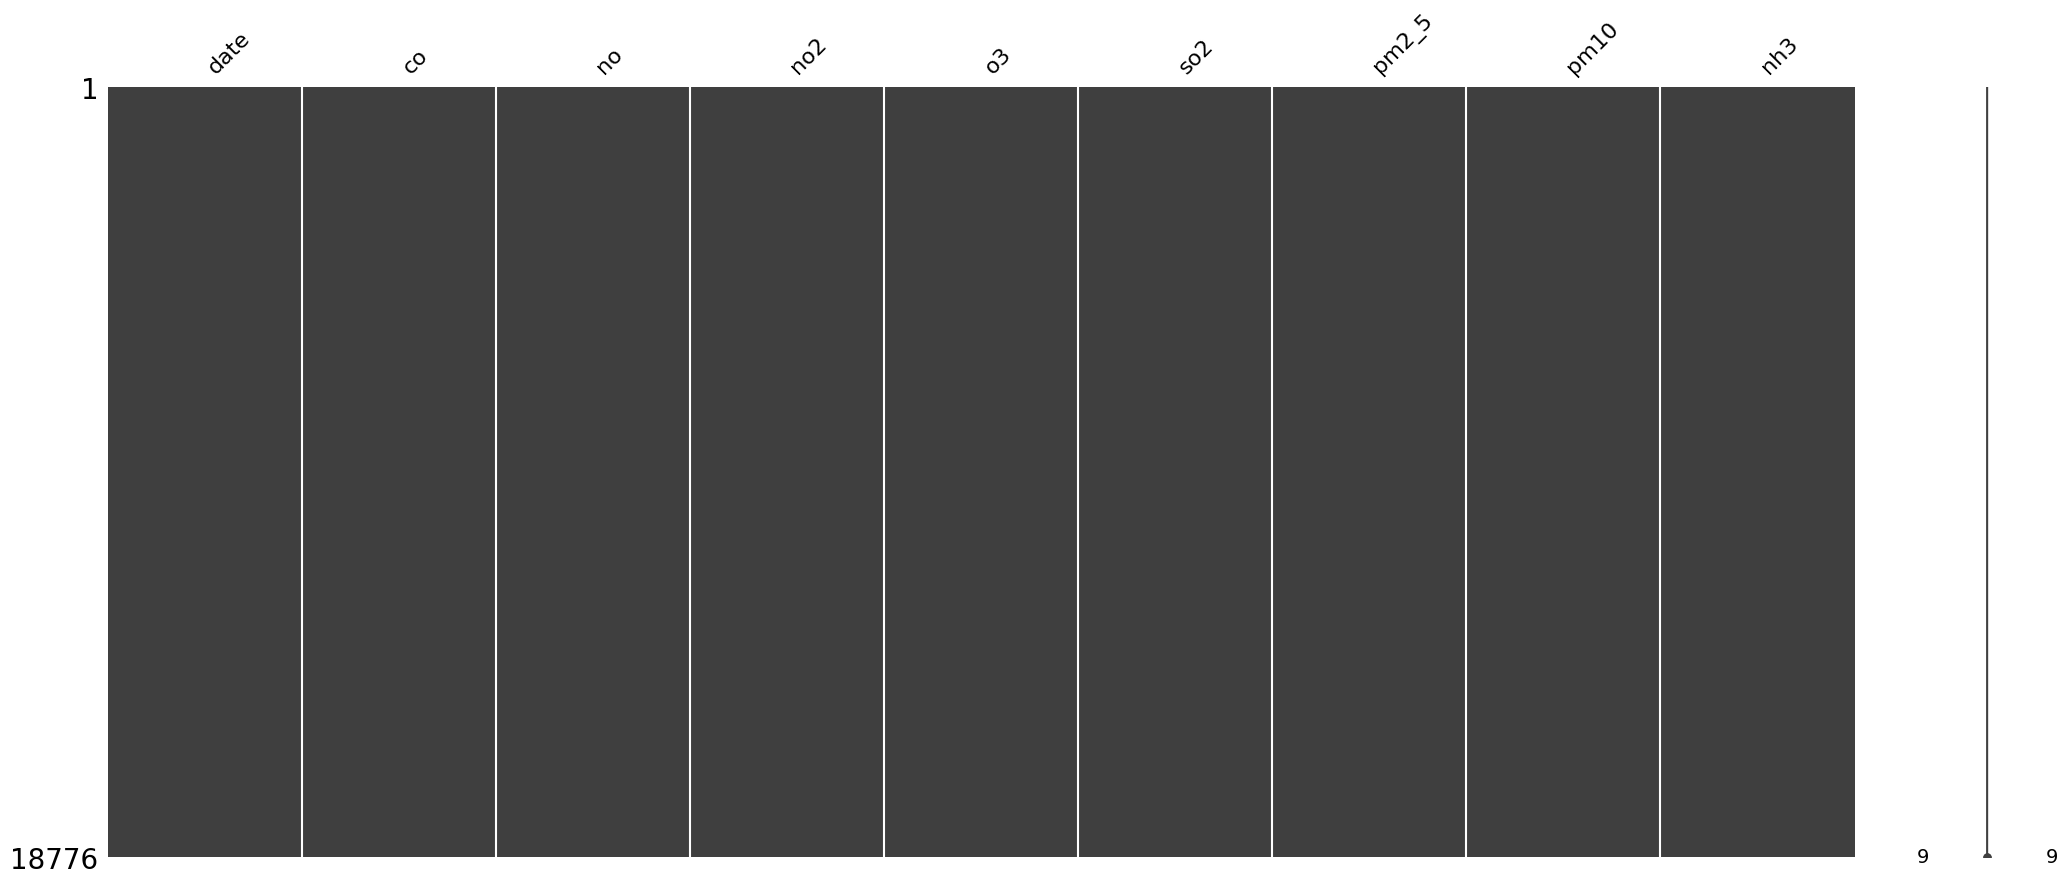

In [11]:
msno.matrix(df)
plt.show()

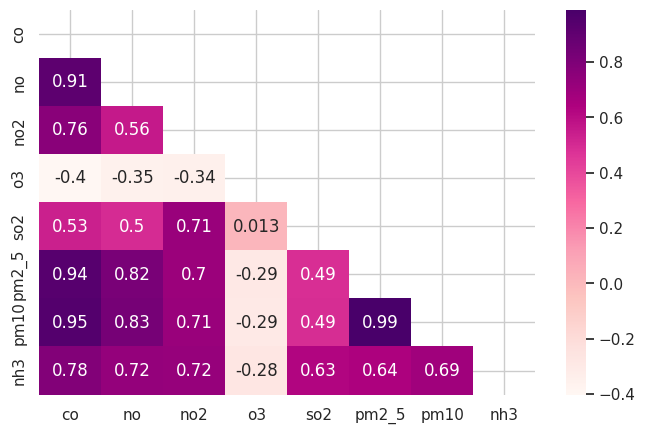

In [79]:
plt.figure(figsize = (8,5))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(df.corr(numeric_only=True),cmap="RdPu",mask=mask,annot=True)
plt.show()

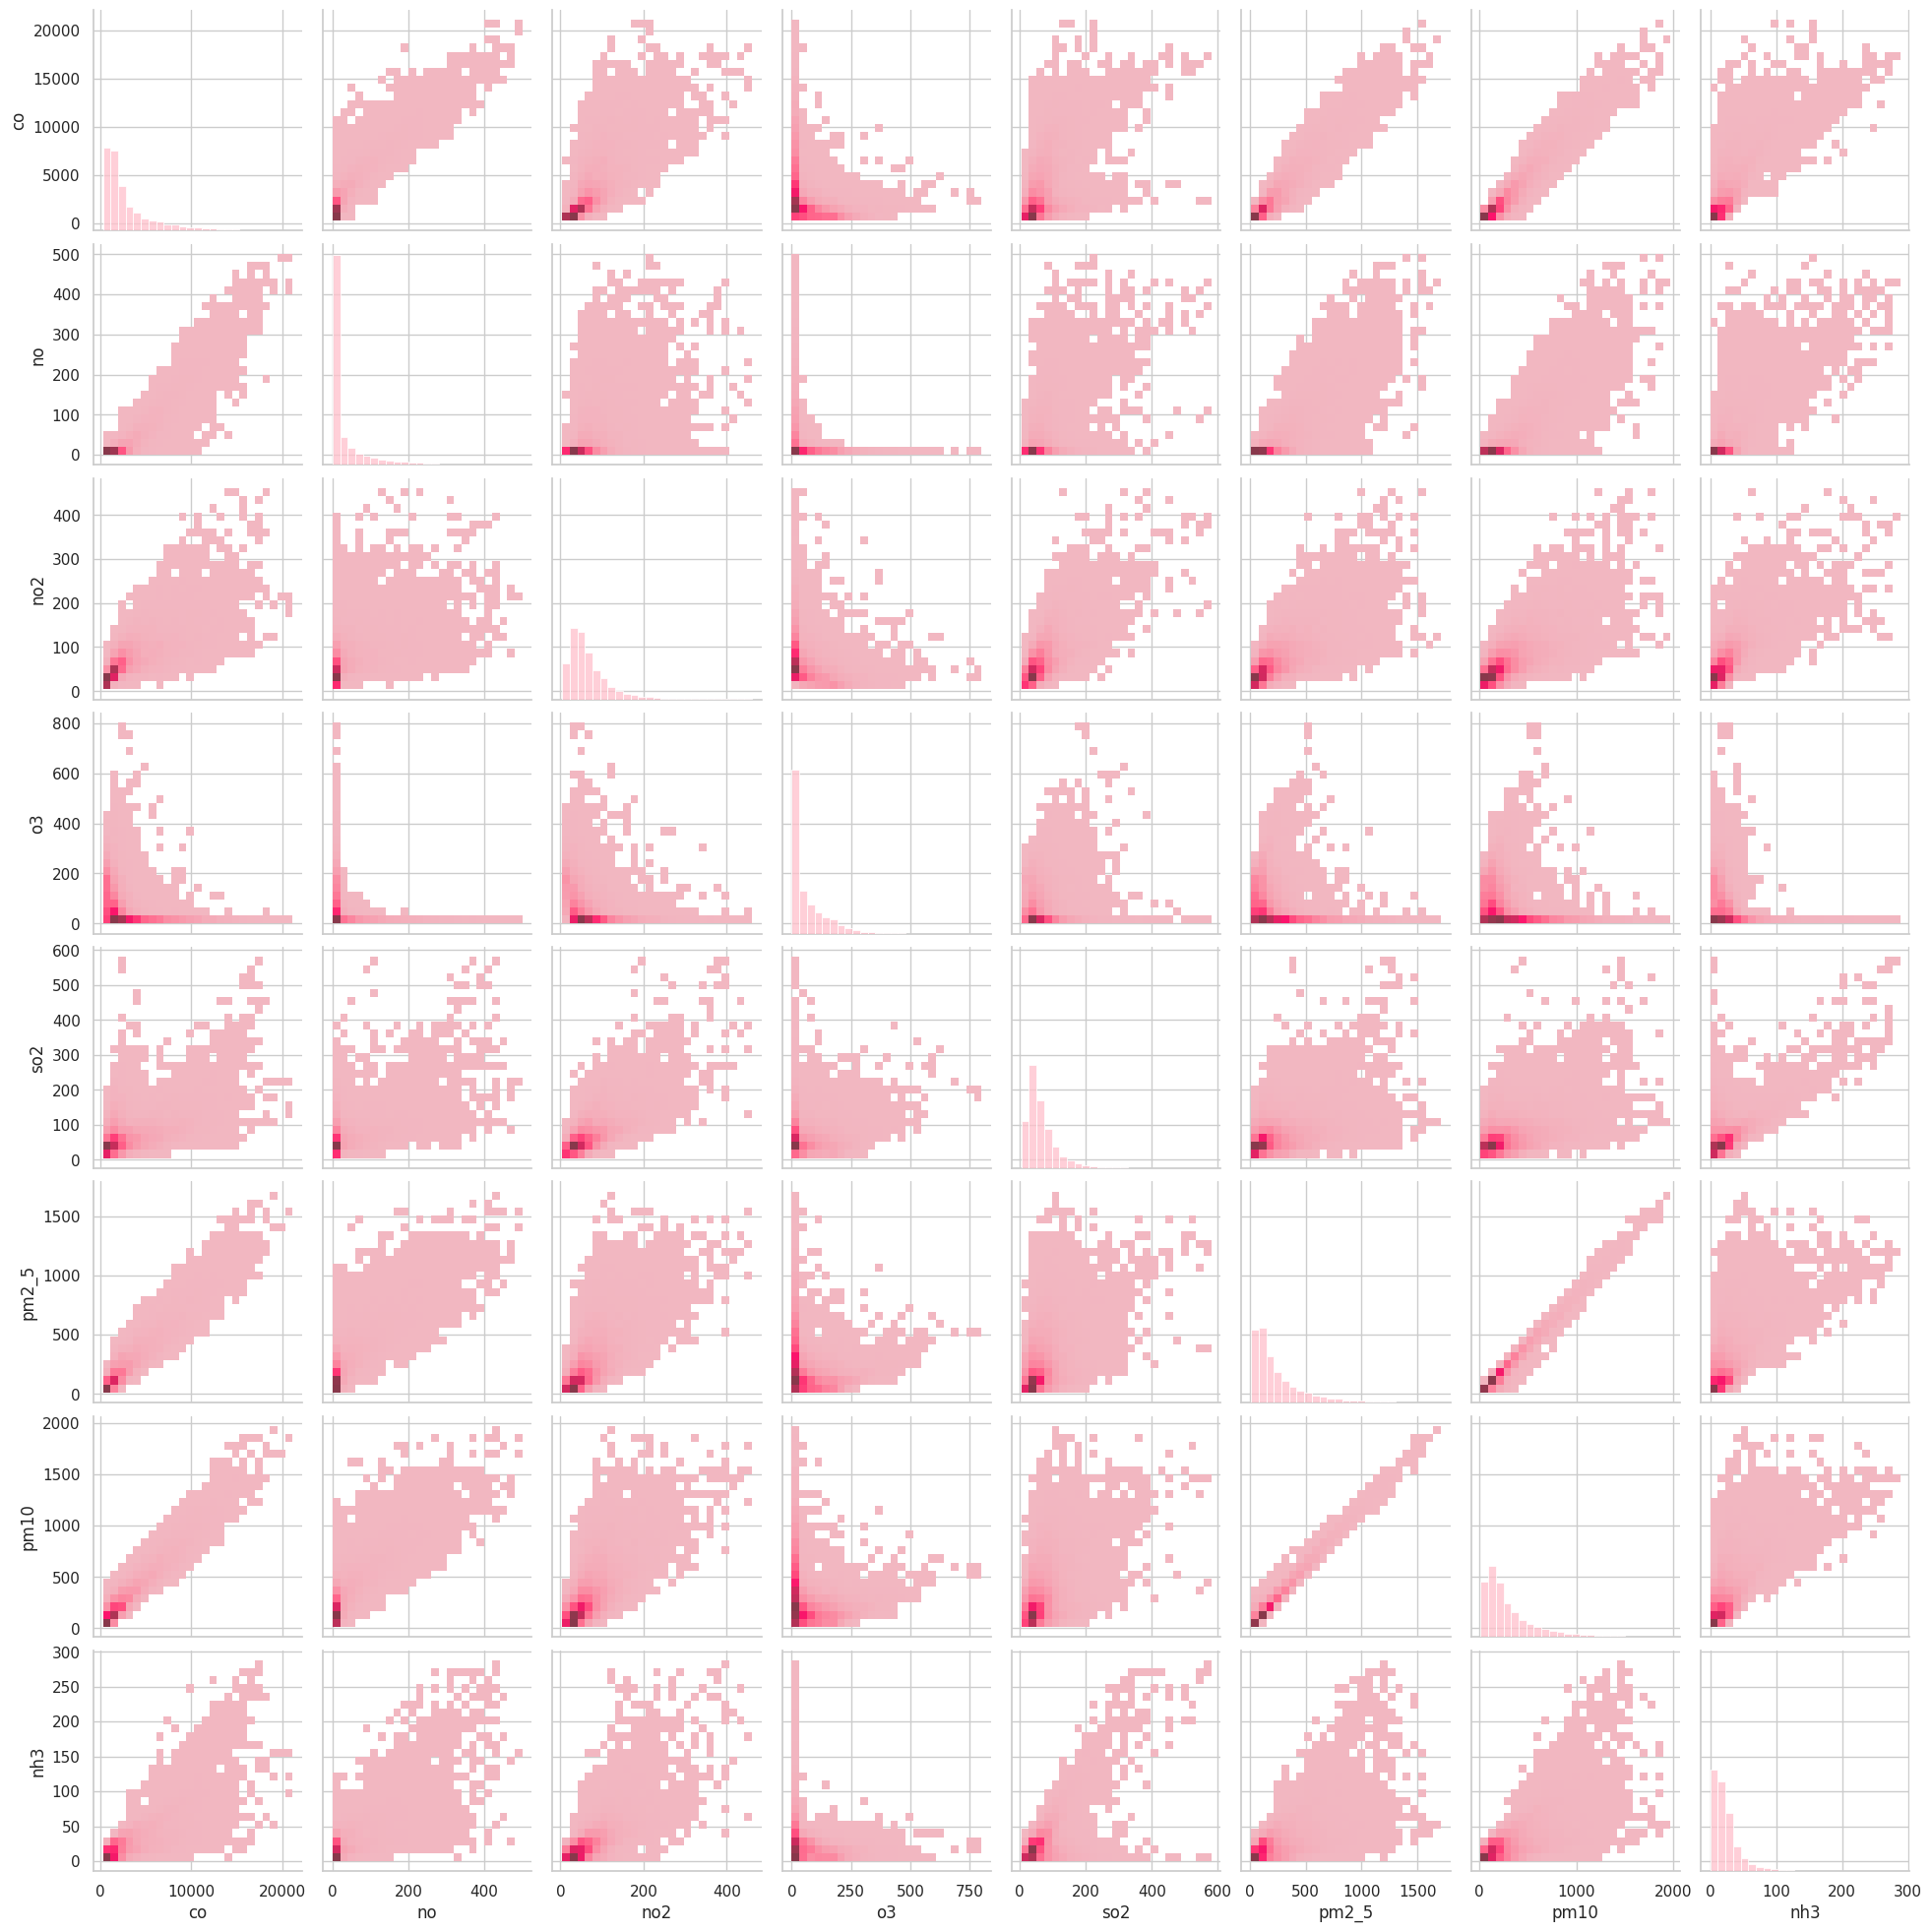

In [19]:
sns.set(style="whitegrid", palette="pink")
sns.pairplot(df, kind="hist", plot_kws={"color":"pink","bins":25}, diag_kws={"color":"pink","bins":25})
plt.show()

**linear regression**

In [85]:
mod=sm.ols(formula='df["nh3"]~df["o3"]',data=df)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              df["nh3"]   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1548.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:10:52   Log-Likelihood:                -87360.
No. Observations:               18776   AIC:                         1.747e+05
Df Residuals:                   18774   BIC:                         1.747e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5745      0.232    132.071      0.0

In [86]:
predictors = ["o3"]
outcome = "nh3"
model = LinearRegression()
model.fit(df[predictors], df[outcome])
print(f"Intercept of co and nh3: {model.intercept_:.3f}")
print(f"Coefficient co and nh3: {model.coef_[0]:.3f}")

Intercept of co and nh3: 30.574
Coefficient co and nh3: -0.091


In [87]:
fitted = model.predict(df[predictors])
residuals = df[outcome] - fitted
print(residuals.head())

0    -0.713850
1    10.495384
2    18.666017
3    18.138678
4    17.590339
Name: nh3, dtype: float64


In [88]:
RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))
print(f"Root mean squared error of co and nh3: {RMSE:.2f}")

Root mean squared error of co and nh3: 25.38


In [89]:
r2 = r2_score(df[outcome], fitted)
print(f"r2 #1: {r2:.4f}")

r2 #1: 0.0762


In [109]:
metrics = {
    "Metric": ['R-squared', 'RMSE',"Model intercept","Model coefficient"],
    "Value": [r2, RMSE,model.intercept_,model.coef_[0]]
}

sign_metrics = pd.DataFrame(metrics)

print(sign_metrics)

              Metric      Value
0          R-squared   0.076167
1               RMSE  25.376038
2    Model intercept  30.574499
3  Model coefficient  -0.090556


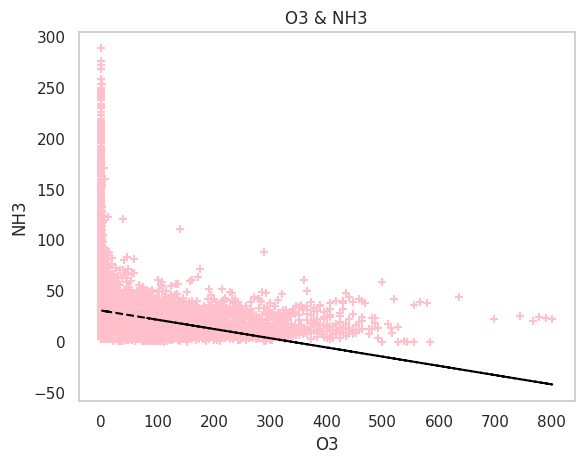

In [93]:
plt.scatter(df["o3"],df["nh3"],color='pink',marker='+')
plt.plot(df["o3"], model.intercept_+model.coef_*df["o3"],color='black',linestyle="dashed")
plt.title('O3 & NH3')
plt.xlabel('O3')
plt.ylabel('NH3')
plt.grid(False)
plt.show()

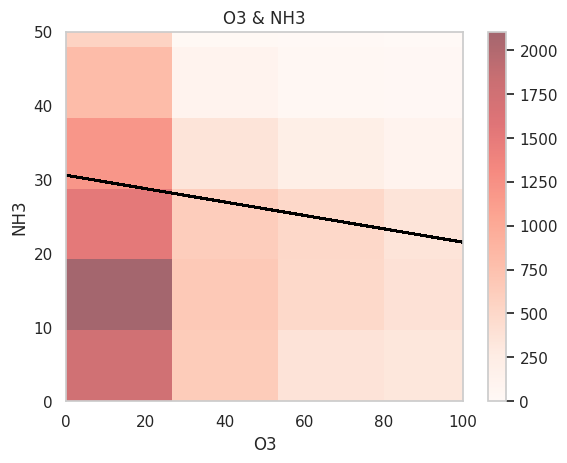

In [105]:
plt.hist2d(df["o3"],df["nh3"],bins=30,cmap="Reds", alpha=0.6)
plt.colorbar()
plt.plot(df["o3"], model.intercept_+model.coef_*df["o3"],color='black')
plt.title("O3 & NH3")
plt.xlabel("O3")
plt.ylabel("NH3")

plt.xlim(0, 100) #to zoom in the plot, couldnt see it clearly before
plt.ylim(0, 50)

plt.grid(False)
plt.show()

In [135]:
X = df[["nh3","no","no2","so2","pm2_5","pm10","o3"]]
y = df["co"]

X = sm2.add_constant(X)
est = sm2.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:10:42   Log-Likelihood:            -1.3833e+05
No. Observations:               18776   AIC:                         2.767e+05
Df Residuals:                   18768   BIC:                         2.767e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806      6.279     39.750      0.000     237.274     261.888
nh3           10.1942      0.202     50.351      0.000       9.797      10.591
no            18.3717      0.101    181.424      0.000      18.173      18.570
no2           13.1684      0.128    103.158      0.000      12.918      13.419
so2           -5.5642      0.098    -56.931      0.000      -5.756      -5.373
pm2_5          1.6229      0.092     17.685      0.000       1.443       1.803
pm10           3.2663      0.082     40.051      0.000       3.106       3.426
o3            -1.0327      0.044    -23.595      0.000      -1.118      -0.947
==============================================================================
Omnibus:                     2347.249   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16951.890
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       7.593   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
predictors = ["nh3", "no", "no2", "so2", "pm2_5", "pm10","o3"]
outcome = 'co'
modelM = LinearRegression()
modelM.fit(df[predictors], df[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, modelM.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 30.574
Coefficients:
 nh3: 10.194
 no: 18.372
 no2: 13.168
 so2: -5.564
 pm2_5: 1.623
 pm10: 3.266
 o3: -1.033


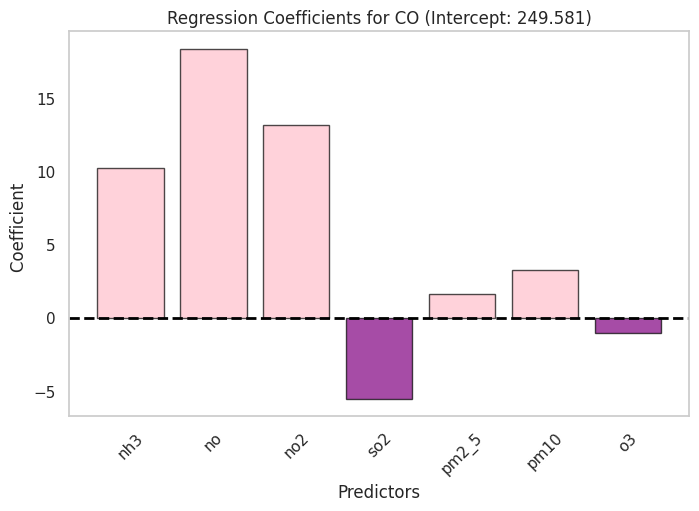

In [139]:
predictors = ["nh3", "no", "no2", "so2", "pm2_5", "pm10","o3"]
coef_values = modelM.coef_

colors = ["pink" if coef > 0 else "purple" for coef in coef_values]

plt.figure(figsize=(8, 5))
plt.bar(predictors, coef_values, color=colors, alpha=0.7, edgecolor="black")


plt.axhline(y=0, color="black", linestyle="dashed", linewidth=2)

plt.title(f"Regression Coefficients for CO (Intercept: {modelM.intercept_:.3f})")
plt.xlabel("Predictors")
plt.ylabel("Coefficient ")


plt.xticks(rotation=45)
plt.grid(False)

plt.show()

In [164]:
#dropped the pollutants with the highest coeffiecients
predictors_dropped = [p for p in predictors if p not in ["no", "nh3", "no2"]]
X_dropped = df[predictors_dropped]
X_dropped = sm.add_constant(X_dropped)
est_dropped = sm.OLS(y, X_dropped).fit()
print(est_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 6.252e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:45:05   Log-Likelihood:            -1.5105e+05
No. Observations:               18776   AIC:                         3.021e+05
Df Residuals:                   18771   BIC:                         3.021e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0631     11.362      5.463      0.0

In [165]:
fitted2 = est_dropped.predict(X_dropped)
residuals2 = y - fitted2
print(residuals2.head())

0   -1328.993896
1   -1178.805880
2    -876.192613
3    -845.090168
4    -973.830824
dtype: float64


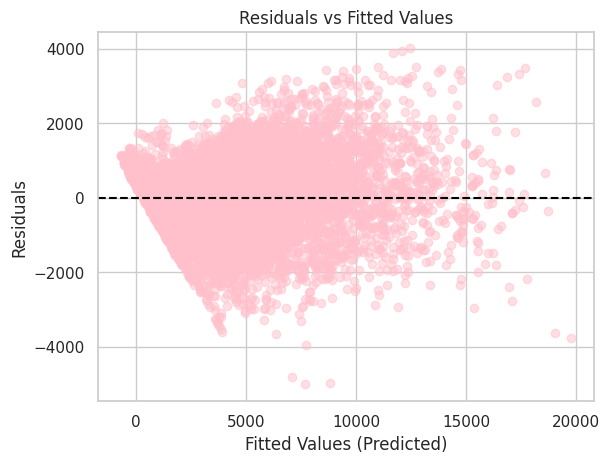

In [166]:
plt.scatter(fitted2, residuals2, color="pink", alpha=0.5)
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()


In [167]:
#dropped the pollutants with the highest std and coefficient
predictors_dropped_std = [p for p in predictors_dropped if p not in ["pm10"]]
X_dropped_std = df[predictors_dropped_std]
X_dropped_std = sm.add_constant(X_dropped_std)
est_dropped = sm.OLS(y, X_dropped_std).fit()
print(est_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 6.361e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:45:16   Log-Likelihood:            -1.5338e+05
No. Observations:               18776   AIC:                         3.068e+05
Df Residuals:                   18772   BIC:                         3.068e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        302.0695     12.315     24.528      0.0

In [168]:
fitted3 = est_dropped.predict(X_dropped_std)
residuals3 = y - fitted3
print(residuals3.head())

0   -1684.897361
1   -1455.823222
2   -1097.363672
3   -1047.572017
4   -1148.679172
dtype: float64


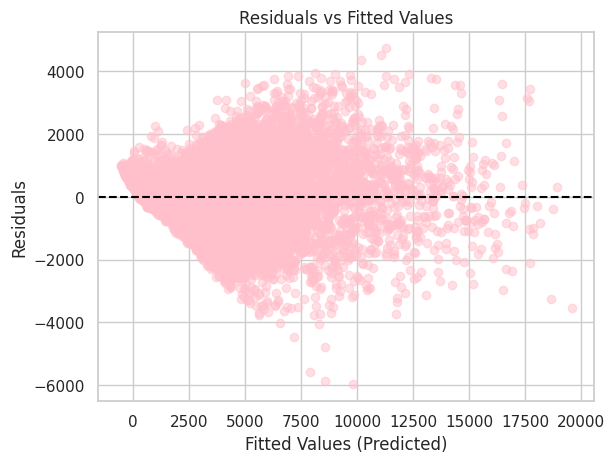

In [169]:
plt.scatter(fitted3, residuals3, color="pink", alpha=0.5)
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()